In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
from sklearn.linear_model import LinearRegression

In [2]:
train = pd.read_csv('train2.csv')
test = pd.read_csv('test2.csv')

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [5]:
test.keys()

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
print(test.isna().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [8]:
print(train.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# DATA CLEANING|

In [10]:
#fill missing value of age in train
train['Age'].fillna(train['Age'].mean(), inplace= True)

#fill missing value of age in test
test['Age'].fillna(test['Age'].mean(), inplace= True)

#fill missing value of Fare in train
test['Fare'].fillna(test['Fare'].mean(), inplace= True)

In [11]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)
test['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)

In [12]:
print(train.isna().sum())
print('===================')
print(test.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


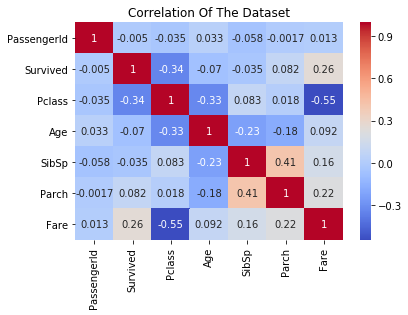

In [13]:
#A correlation graph

corr = train.corr()
sns.heatmap(corr, cmap= 'coolwarm', annot = True)
plt.rcParams["figure.figsize"] = (11,11)
plt.title('Correlation Of The Dataset')
#plt.savefig ('Correlation Of The Dataset')
plt.show()

In [14]:
# Droping cabin because more than half of the data in that column is missing

train.drop(['Cabin'],axis=1,inplace=True)
test.drop(['Cabin'],axis=1,inplace=True)

In [15]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [16]:
test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q


In [17]:
#Droping this also because they are not really important

train.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)
test.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)

In [18]:
train.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.25,S


# EXPLORATORY DATA ANALYSIS

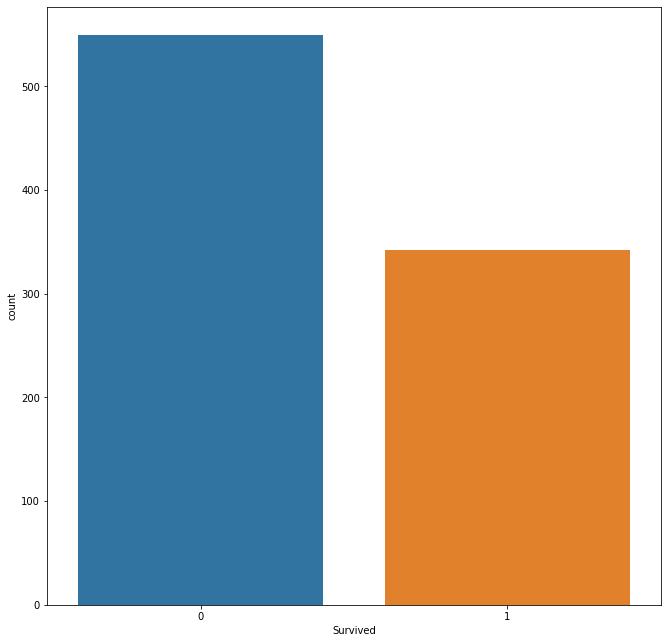

In [19]:
sns.countplot(train['Survived']);

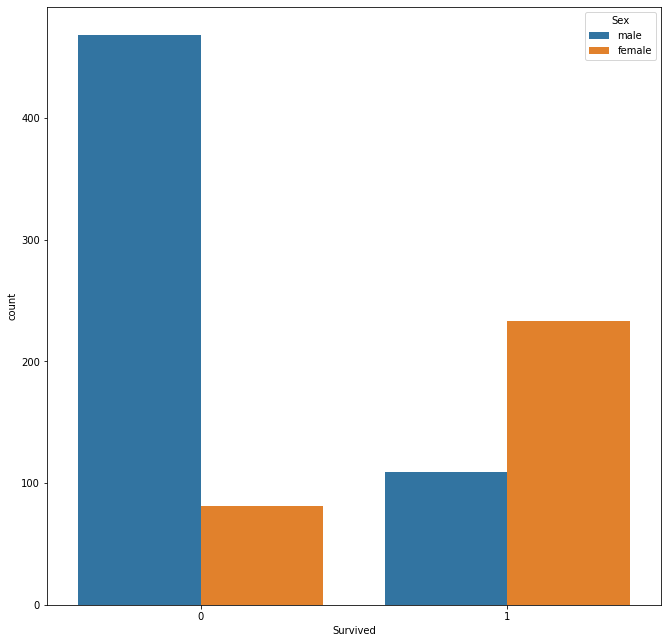

In [20]:
sns.countplot(x ='Survived', hue= 'Sex', data= train);

In [21]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


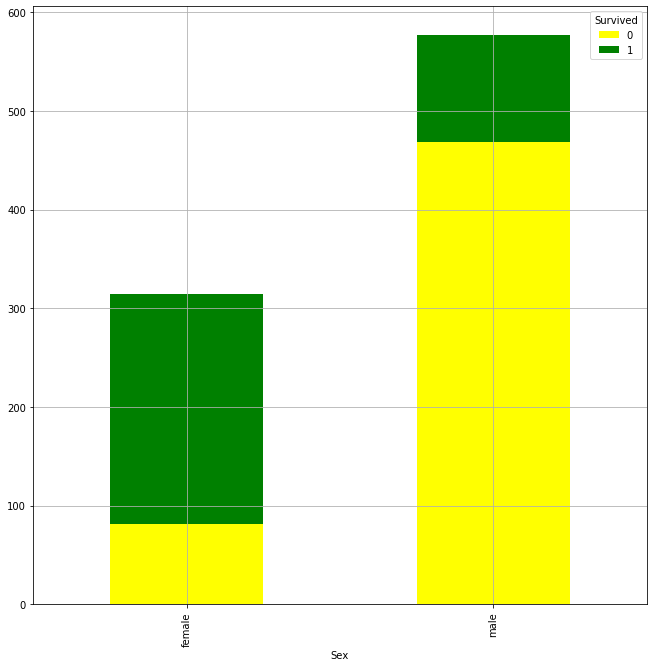

In [22]:
pt = pd.crosstab(train['Sex'], train['Survived'])
pt.plot(kind='bar', stacked=True, color=['yellow', 'green'], grid=True);

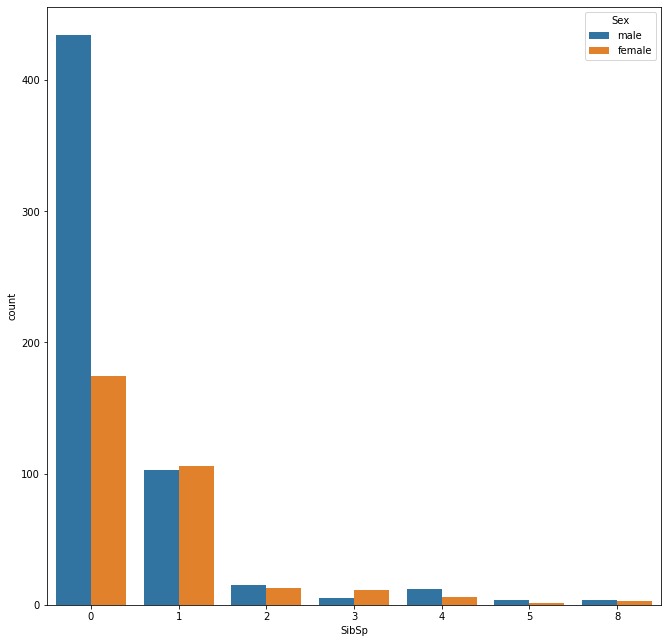

In [23]:
sns.countplot(train['SibSp'], hue= train['Sex']);

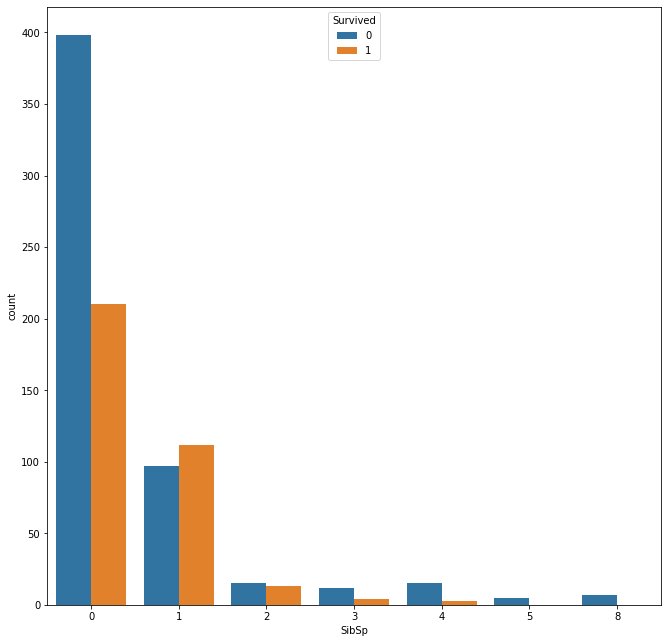

In [24]:
sns.countplot(train['SibSp'], hue= train['Survived']);

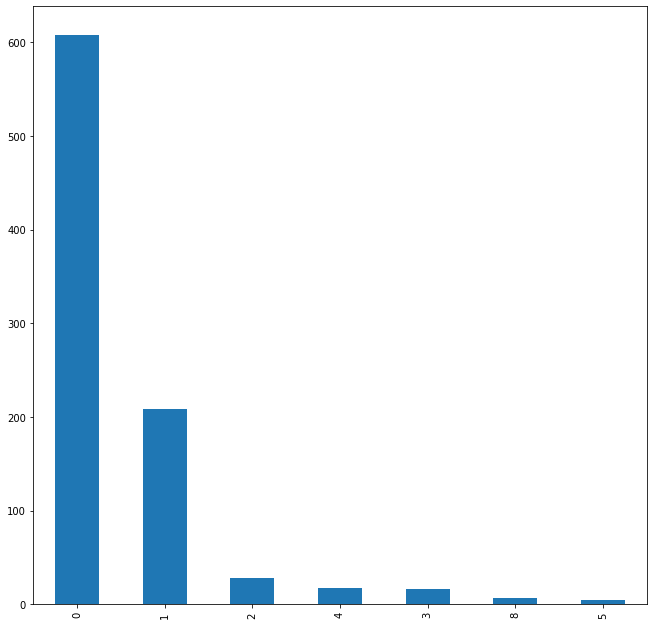

In [25]:
train.SibSp.value_counts().plot(kind='bar');

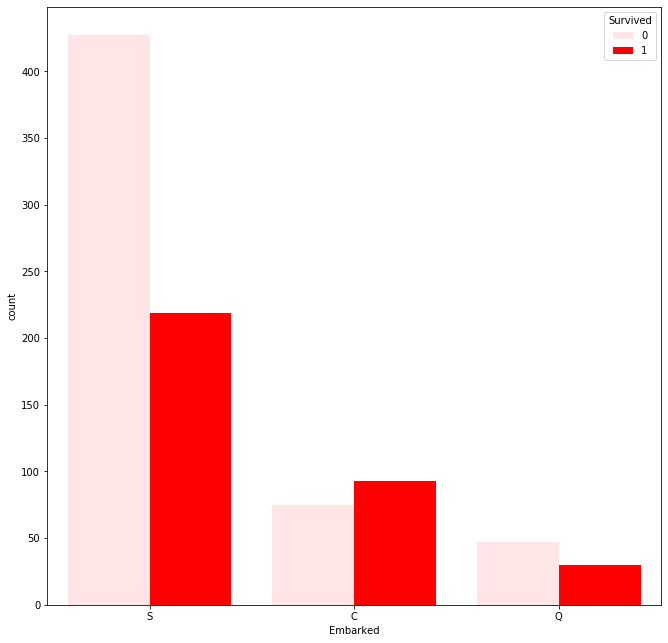

In [26]:
sns.countplot(x='Embarked', hue='Survived', data=train, color='red', saturation=1.90);

# creating my dependent and independent variable

In [27]:
x = train.drop(['Survived'],axis=1)

In [28]:
x.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.25,S


In [29]:
y = train.iloc[:,0:1]

In [30]:
y.head(1)

,Survived
0,0


In [31]:
x['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

# spliting the embarked column values into seperate columns

In [32]:
x = pd.get_dummies(data = x, columns = ['Embarked'])
x.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,male,22.0,1,0,7.25,0,0,1


In [33]:
test = pd.get_dummies(data = test, columns = ['Embarked'])
test.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,male,34.5,0,0,7.8292,0,1,0


# label encode the sex

In [34]:
le = LabelEncoder()
x['Sex'] = le.fit_transform(x['Sex'])
x.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.000000,1,0,7.2500,0,0,1
1,1,0,38.000000,1,0,71.2833,1,0,0
2,3,0,26.000000,0,0,7.9250,0,0,1
3,1,0,35.000000,1,0,53.1000,0,0,1
4,3,1,35.000000,0,0,8.0500,0,0,1
5,3,1,29.699118,0,0,8.4583,0,1,0
6,1,1,54.000000,0,0,51.8625,0,0,1
7,3,1,2.000000,3,1,21.0750,0,0,1
8,3,0,27.000000,0,2,11.1333,0,0,1
9,2,0,14.000000,1,0,30.0708,1,0,0


In [35]:
le = LabelEncoder()
test['Sex'] = le.fit_transform(test['Sex'])
test.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,0,1,0
1,3,0,47.0,1,0,7.0000,0,0,1
2,2,1,62.0,0,0,9.6875,0,1,0
3,3,1,27.0,0,0,8.6625,0,0,1
4,3,0,22.0,1,1,12.2875,0,0,1
5,3,1,14.0,0,0,9.2250,0,0,1
6,3,0,30.0,0,0,7.6292,0,1,0
7,2,1,26.0,1,1,29.0000,0,0,1
8,3,0,18.0,0,0,7.2292,1,0,0
9,3,1,21.0,2,0,24.1500,0,0,1


# Plot the feature importance GRAPH to see which column is really important

## From the graph we can see all our columns are important, embarked is the list because we have broken it down into seperate columns, if it was still a single column it would gotten a higer score

[0.10757403 0.29066093 0.24985433 0.0449109  0.04374542 0.23314652
 0.01308204 0.0067184  0.01030743]


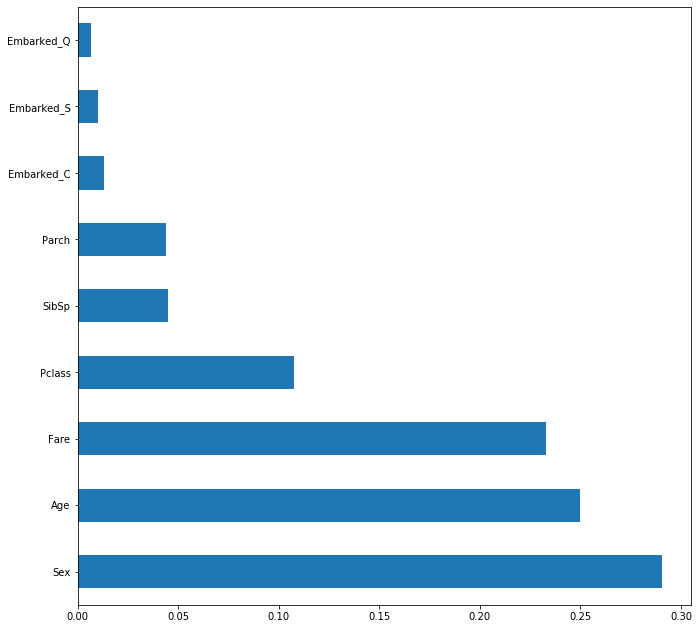

In [36]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scale = StandardScaler()
x = scale.fit_transform(x)
test= scale.fit_transform(test)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size =0.3, random_state = 42)

In [41]:
# Spot Check Algorithms
models = []
#models.append(('LinearRegression', LinearRegression()))
models.append(('LR', LogisticRegression(multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KND', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(random_state=42)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.799303 (0.052863)
LDA: 0.792929 (0.044332)
KND: 0.797729 (0.023135)
DTC: 0.764116 (0.018516)
GaussianNB: 0.770439 (0.020922)
SVM: 0.831406 (0.042339)


# FITIING ON SVC BECAUSE IT HAS THE BEST ACCURACY

In [42]:
model = SVC(gamma='auto')
model.fit(x_train, y_train)
predictions1 = model.predict(x_val)
predictions1

print(accuracy_score(y_val, predictions1))
print(confusion_matrix(y_val, predictions1))
print(classification_report(y_val, predictions1))
#cm = confusion_matrix(y_val, predictions)                           
#sns.heatmap(cm, annot=True, fmt='d');

0.8171641791044776
[[146  11]
 [ 38  73]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.86       157
           1       0.87      0.66      0.75       111

    accuracy                           0.82       268
   macro avg       0.83      0.79      0.80       268
weighted avg       0.82      0.82      0.81       268



# PLOTING THE AUC CURVE TO UNDERSTAND HOE MY MODEL IS DOING

In [43]:
from sklearn import metrics

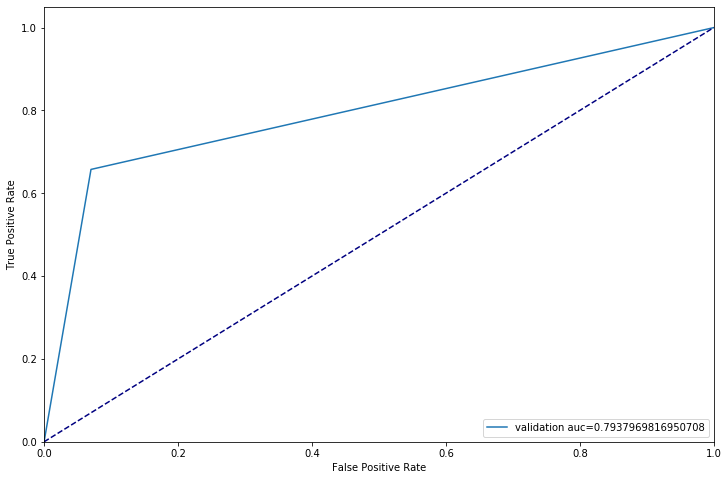

In [44]:
fpr, tpr, thresholds = metrics.roc_curve(y_val, predictions1)
auc = metrics.roc_auc_score(y_val, predictions1)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label='validation auc='+str(auc))
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4);

In [45]:
fpr, tpr, thresholds = metrics.roc_curve(y_val, predictions1)
metrics.auc(fpr, tpr)

0.7937969816950708

# NOW PREDICTING ON OUR TEST DATASET

In [46]:
model = SVC()
model.fit(x_train, y_train)
pred = model.predict(test)
pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [47]:
yfinal = pd.DataFrame({'Survived' :pred})

In [48]:
yfinal['Survived'].value_counts()

0    289
1    129
Name: Survived, dtype: int64

In [49]:
yfinal

,Survived
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,0
8,1
9,0
